In [1]:
import pandas as pd
import os
PROJ_ROOT = os.path.join(os.pardir)

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import operator

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm


data_path = os.path.join(PROJ_ROOT, 
                         'data')

import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
full_data=pd.read_csv(data_path+'\\'+'temp_full_data.csv')
tweets=full_data.full_text

## LDA Topic Modeling

### Load necessary files

In [3]:
full_data=pd.read_csv(data_path+'\\'+'temp_full_data.csv')

files = ['all_tokens.pkl','tweets_gdict.pkl','corpus.pkl',
         'texts.pkl']

for fn in tqdm(files):
    var=re.findall(r'(.*)\.',fn)[0]
    globals()[var] = pickle.load( open( data_path+'\\'+fn, 'rb' ) )

  0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
coherence_values = pickle.load(open(data_path+'\\'+'coherence_values.pkl','rb'))

### Plot results of the naive models

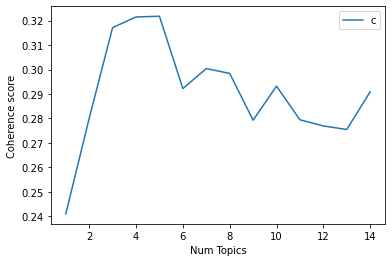

In [5]:
#plot the coherence values for different topic numbers
limit=15; start=1
x=range(start, limit)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend('coherence_values', loc='best')
plt.show()

In [6]:
from pprint import pprint
#print the coherence values, and the index & cv for the highest cv value
pprint(coherence_values)
index, value = max(enumerate(coherence_values), key=operator.itemgetter(1))
num_topics = len(coherence_values[:index+1])
print(index, value)
print(num_topics, ' number of topics to be used')

[0.2409125597912077,
 0.2800806042947272,
 0.3171639175987016,
 0.3215055649681553,
 0.32179694064705433,
 0.2921852213487059,
 0.30038541763491633,
 0.2984128495380771,
 0.27927221557560233,
 0.2932006816855416,
 0.2794232567110878,
 0.2769115091589724,
 0.27545853819011845,
 0.29085384301829936]
4 0.32179694064705433
5  number of topics to be used


### Load and view the parameters of the model with 3 topics
This is the numbe of topics where we see the largest jump in coherence values

In [7]:
models = pickle.load( open( data_path+'\\'+'all_lda_models_3t.pkl', 'rb' ) )
model_results = pickle.load(open(data_path+'\\'+'model_results_3t.pkl','rb'))

In [8]:
#create a df of the param values and results
lda_tuning = pd.DataFrame(model_results)
lda_tuning.head()

,validation_set,topics,alpha,beta,coherence
0,100% Corpus,3,0.01,0.01,0.307912
1,100% Corpus,3,0.01,0.31,0.336507
2,100% Corpus,3,0.01,0.61,0.345389
3,100% Corpus,3,0.01,0.91,0.350273
4,100% Corpus,3,0.01,symmetric,0.336676


In [9]:
# find the row with the coherence value and display the parameters
idx =lda_tuning['coherence'].idxmax(axis=0)
lda_tuning.iloc[idx]

validation_set    100% Corpus
topics                      3
alpha                    0.01
beta                     0.91
coherence            0.350273
Name: 3, dtype: object

### View the top words of the LDA model

In [10]:
#display the topics along with the top 15 words for each topic
pprint(models[idx].print_topics(num_words=15))

[(0,
  '0.064*"vaccine" + 0.058*"coronavirus" + 0.013*"j&;j" + 0.013*"pfizer" + '
  '0.011*"dose" + 0.007*"johnson_johnson" + 0.006*"moderna" + '
  '0.005*"pfizer_moderna" + 0.005*"new" + 0.004*"study" + 0.004*"shoot" + '
  '0.004*"variant" + 0.004*"mrna" + 0.003*"virus" + 0.003*"fda"'),
 (1,
  '0.059*"coronavirus" + 0.033*"vaccine" + 0.013*"dose" + 0.010*"vaccinate" + '
  '0.009*"vaccination" + 0.006*"coronavirus vaccine" + 0.005*"today" + '
  '0.005*"receive" + 0.005*"state" + 0.004*"week" + 0.004*"people" + '
  '0.004*"death" + 0.004*"update" + 0.004*"case" + 0.004*"new"'),
 (2,
  '0.036*"coronavirus" + 0.025*"vaccine" + 0.018*"vaccinate" + 0.011*"people" '
  '+ 0.009*"get" + 0.009*"pandemic" + 0.009*"virus" + 0.006*"vaccination" + '
  '0.005*"need" + 0.005*"vax" + 0.004*"know" + 0.004*"time" + 0.004*"want" + '
  '0.004*"like" + 0.003*"work"')]


In [11]:
#display the pLDAvis plot to visualize the LDA model
vis = pyLDAvis.gensim.prepare(models[idx], corpus, tweets_gdict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.134614  0.065198       1        1  61.253024
1      0.001348 -0.128476       2        1  23.766745
0     -0.135962  0.063278       3        1  14.980230, topic_info=             Term          Freq         Total Category  logprob  loglift
23        vaccine  21680.000000  21680.000000  Default  30.0000  30.0000
6     coronavirus  29963.000000  29963.000000  Default  29.0000  29.0000
1122       pfizer   2545.000000   2545.000000  Default  28.0000  28.0000
37           dose   3849.000000   3849.000000  Default  27.0000  27.0000
781          j&;j   1339.000000   1339.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
427         virus    313.720713   4039.772916   Topic3  -5.7617  -0.6570
1490    available    201.486304    580.424550   Topic3  -6.2045   0.8404
102         datum    207.843470    762.063187   Topic3  -6.1734   0.5992
89       pandemic    216.002340   4286.167265   Topic3  -6.1349  -1.0894
295          news    199.501146    796.103412   Topic3  -6.2144   0.5145

[224 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
24        1  0.524647        $
24        2  0.022632        $
24        3  0.452637        $
4406      1  0.009874    $_jnj
4406      2  0.009874    $_jnj
...     ...       ...      ...
341       2  0.491983        |
341       3  0.506835        |
1588      1  0.008878  ░_░_░_░
1588      2  0.985504  ░_░_░_░
1588      3  0.008878  ░_░_░_░

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [12]:
pyLDAvis.save_html(vis,data_path+'\\'+'covid_topics_3t.html')

## Wrangle Topic data

### create a topic & topic map

In [13]:
# # to be used if no topic names are given
# TOPICS = [x for x,y in models[idx].print_topics()]
# TOPIC_MAP = {x:x for x in TOPICS}

# give topic names and create a topic map
TOPICS = ['Vaccine Info', 'Pandemic Updates', 'Opinion']
TOPIC_MAP = {0.0:'Vaccine Info', 1.0:'Pandemic Updates',2.0:'Opinion'}

# 0.0 = Vaccine distribution, studies, update on manufacturing, release etc.
# 1.0 = Covid, pandemic, vaccine updates(doses administered, deaths, cases etc.)
# 2.0 = Opinion on Covid, Vaccine, Politics

### Find the distribution of topics for each tweet

In [14]:
# create a list of the index of the dataset
key=full_data.index.tolist()

In [15]:
# create a dataframe that will show the topic distrubtion of each tweet
tweet_topic = {}


for tweet in tqdm(range(len(corpus))): # for each tweet/document in corpus
    re_bow = corpus[tweet]        #obtain the bow for the tweet
    res_topics = models[idx].get_document_topics(re_bow, 0) #obtain the topics mentioned in the tweet
    tmp = []
    for topic_id, topic_prob in res_topics: #obtain the topic id and topic probability for each topic in the tweet
        tmp.append(topic_prob)
    tweet_topic[key[tweet]]=tmp #assign the topic

  0%|          | 0/46324 [00:00<?, ?it/s]

In [16]:
topics_df = pd.DataFrame.from_dict(tweet_topic, orient='index') # create df from the dictionary
topic_cols = cols=[x.lower().replace(' ','_').replace('/','_') for x in TOPICS]
topics_df.columns = topic_cols

# if the topic names are generic 'topic_0' etc
# topics_df = pd.DataFrame.from_dict(tweet_topic, orient='index') # create df from the dictionary
# topic_cols = ['topic_'+str(x).lower() for x in TOPICS]
# topics_df.columns = topic_cols

In [17]:
topics_df.head()

,vaccine_info,pandemic_updates,opinion
0,0.000385,0.000385,0.999230
1,0.020993,0.000717,0.978290
2,0.000832,0.000832,0.998336
3,0.998663,0.000668,0.000668
4,0.000501,0.000501,0.998998


### Find dominant topics per tweet

In [18]:
tweet_ids = full_data.tweet_id.tolist()

In [19]:
def format_topics_sentences(lda_model, corpus=corpus, texts=texts, tweet_ids=tweet_ids):
    ''' Model that creates a df that displays the dominant topic for each response/text'''
    
    sent_topics_df = pd.DataFrame()
    
    for i, row in tqdm(enumerate(lda_model[corpus])):
        
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ', '.join([word for word,prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic','perc_contribution','topic_keywords']
    
    #add tweet, tweet_ids & topics
    contents = pd.Series(texts)
    tweet_ids = pd.Series(tweet_ids)
    
    sent_topics_df = pd.concat([sent_topics_df, contents, tweet_ids],axis=1)
    return(sent_topics_df)



In [20]:
#create df to display the dominant topic for each response
df_topic_sents_keywords = format_topics_sentences(models[idx], corpus, tweets, tweet_ids)

#adjust col labels
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns=['document_no','dominant_topic','topic_perc_contrib', 'keywords','text','tweet_id']


0it [00:00, ?it/s]

In [21]:
df_dominant_topic['processed_text'] = all_tokens
display(df_dominant_topic.head())

,document_no,dominant_topic,topic_perc_contrib,keywords,text,tweet_id,processed_text
0,0,2.0,0.9992,"coronavirus, vaccine, vaccinate, people, get, ...",Here’s what's in the COVID relief package:\n \...,1.364223e+18,"[coronavirus, relief_package, direct, check, f..."
1,1,2.0,0.9536,"coronavirus, vaccine, vaccinate, people, get, ...",Will the National Endowment for the Arts be he...,1.364381e+18,"[national, endowment, help, vaccine, distribut..."
2,2,2.0,0.9983,"coronavirus, vaccine, vaccinate, people, get, ...","This is both anecdotal and early, but many lon...",1.364610e+18,"[anecdotal, early, long, coronavirus, survivor..."
3,3,0.0,0.9987,"vaccine, coronavirus, j&;j, pfizer, dose, john...",A Link to Professor Chossudovsky’s Analysis of...,1.364727e+18,"[link, professor, chossudovsky, analysis, coro..."
4,4,2.0,0.9990,"coronavirus, vaccine, vaccinate, people, get, ...",Children warned over hugging grandparents even...,1.364727e+18,"[child, warn, hug, grandparent, vaccine, small..."


In [22]:
# doucle check that the dataframes have the same indicies
print(full_data.iloc[500].full_text,'\n')
print(df_dominant_topic.iloc[500].text,'\n')
print(df_dominant_topic.iloc[500].processed_text)

Whites in Connecticut are getting COVID vaccine at higher rates than Blacks. Check your community here.
https://t.co/Q53CrTEl5U https://t.co/Bnyb89MHcL 

Whites in Connecticut are getting COVID vaccine at higher rates than Blacks. Check your community here.
https://t.co/Q53CrTEl5U https://t.co/Bnyb89MHcL 

['white', 'connecticut', 'get', 'coronavirus', 'vaccine', 'high_rate', 'black', 'check', 'community']


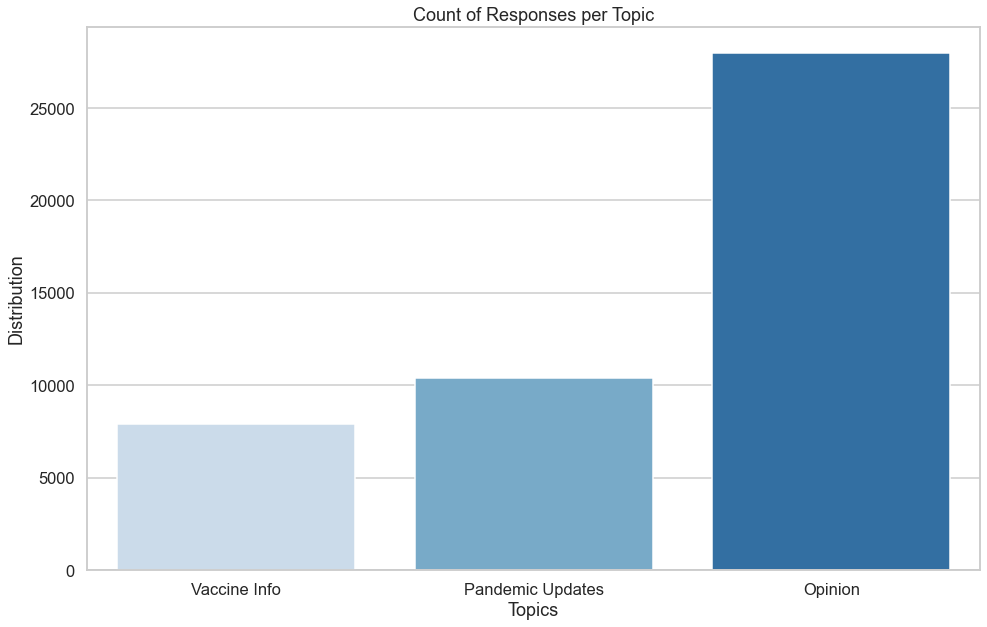

In [23]:
# visualize distribution of topics

#set plot style
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(figsize=(16, 10)) 
#plot data
ax=sns.countplot(x='dominant_topic', data = df_dominant_topic,palette='Blues')
_=plt.ylabel('Distribution')
_=plt.xlabel('Topics')
_=plt.title('Count of Responses per Topic')
_=ax.set_xticklabels(TOPICS)

### Assign ratings within each topic

In [24]:
from collections import defaultdict
topic_text_df = defaultdict(list)

for topic in sorted(df_dominant_topic.dominant_topic.unique()):
    for rating, row in enumerate(df_dominant_topic[(df_dominant_topic.dominant_topic==topic)].sort_values('topic_perc_contrib', ascending=False).iterrows()):
        topic_text_df['topic'].append(topic)
        topic_text_df['text'].append(row[1].text)
        topic_text_df['rating'].append(rating+1)
        topic_text_df['tweet_id'].append(row[1].tweet_id)
        topic_text_df['index'].append(row[1].name)

topic_text_df = pd.DataFrame.from_dict(topic_text_df)

In [25]:
topic_text_df['topic_title']=topic_text_df.topic.map(TOPIC_MAP)

In [26]:
topic_text_df.set_index('index',inplace=True)

In [27]:
topic_text_df.head()

,topic,text,rating,tweet_id,topic_title
index,,,,,
10760,0.0,"US Purchases 100,000 doses of Lilly’s COVID-19...",1,1.365426e+18,Vaccine Info
39757,0.0,Hurting virus by targeting the host: plitideps...,2,1.365355e+18,Vaccine Info
24697,0.0,mRNA-based #vaccines are not 'entirely Utopian...,3,1.365444e+18,Vaccine Info
18657,0.0,اور یہودی سب سے آگے نکل گئے\n\n#Israel has con...,4,1.365432e+18,Vaccine Info
44795,0.0,@EricTopol @guardianscience @JessicaGlenza @al...,5,1.365768e+18,Vaccine Info


In [28]:
print(topic_text_df.topic.value_counts(),'\n',topic_text_df.topic.value_counts(normalize=True) )

2.0    28003
1.0    10407
0.0     7914
Name: topic, dtype: int64 
 2.0    0.604503
1.0    0.224657
0.0    0.170840
Name: topic, dtype: float64


In [29]:
# see the top n rated tweets in t topic
p,n = 1,5 # tweets to print via rating number
tp = 2.0 # topic to print
[print('tweet {} | {} \n {}\n\n'.format(i,x[0],x[1])) for i, x in enumerate(zip(topic_text_df[(topic_text_df.topic==tp)][p:n].text.tolist(),topic_text_df[(topic_text_df.topic==tp)][p:n].index.tolist()))]

tweet 0 | OK : Bill advising DT in 2017 on Vax💉
         Safety .
First bio-weapon release Sars-02 in
2002 failed to catch on in Europe
trial run.
Genetically re-program for Global release 2019 .
16 years HiV Mers Ebola inbetween 
Contaminate 💦H2O GModify food chain for 5.2b virus deaths https://t.co/p7SwLJEyta https://t.co/RGRsd9VVqx 
 34498


tweet 1 | @YakultIndia #FindForFun #YakultIndia #Probiotics #Immunity 
Diff r
Curtain Size
Bottle Shape
Missing Cushion
Missing Potted Plant
Door Colour Frame Brown
Missing Flower
Yatch
Green Book
Toy Dog different
Cat is Missing
Red Flower Missing
Blue Character Missing
Bottle Shape
Plant Missing 
 5449


tweet 2 | 👀👀👀👀👀👀👀👀👀
🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️🤦🏿‍♀️
The longer people in this part of the world remain unvaccinated, the more they'll miss out on such important life events

#VaccinesWork 
#VaccineEquity https://t.co/xvWS2NWNbm 
 43527


tweet 3 | @yeetusharma @Shivamydv07 Ary u said na u r not supporter of any party that's why I

[None, None, None, None]

# Definitions of each topic<br>
### Topic 0.0 =  Vaccine Info ###
   - Vaccine distribution, studies, update on manufacturing, release etc. <br>
        <blockquote>#BJP #TNwithRahulGandhi <br>
                    #BBCnews #CNN #g20 #COP26 <br>
                    #imf #WHO #WTO #Chennai #INDvsENG #TomarModiKisanVirodhi #COVID19Vaccine #COVID19 #Corona #coronavirus #CoronaVaccine #CoronavirusVaccine #biden<br><br>
                    US #FDA which is Gold Standard for drug approvals has cleared #j&amp;j for emerg. use 
        </blockquote><br><br>
 
   
 ### Topic 1.0 = Pandemic Updates ###
 - Coronavirus, pandemic, vaccine updates & reports (doses administered, deaths, cases etc.)
     <blockquote> COVID-19 vaccination doses administrated per 100 people:<br>
                🇮🇱 84.9<br>
                🇸🇨 67.2<br>
                🇦🇪 58.0<br>
                🇵🇼 39.3<br>
                🇬🇧 27.8<br>
                🇺🇸 19.6<br>
                🇧🇭 17.1<br>
                🇨🇱 16.3<br>
                🇲🇭 16.1<br>
                🇲🇻 16.0<br>
                🇷🇸 14.2<br>
                🇲🇹 13.2<br>
                🇫🇲 10.7<br>
                🇩🇰 8.8<br>
                🇹🇷 8.7<br>
                🇨🇭 7.9<br>
                🇮🇸 7.7<br>
                🇷🇴 7.4<br>
                🇳🇴 7.3<br>
                🇲🇦 7.3<br>
                🇱🇹 7.3<br>
                🇫🇷 5.7<br>
                🌍 2.75<br><br>
                #COVID19<br>
                #COVIDVaccine<br><br>
                24/02/2021<br>
                (OWID) <br>
 </blockquote><br><br>
 
  ### Topic 2.0 = Opinion ###
 - Opinion on Covid, Vaccine, Politics
     <blockquote> OK : Bill advising DT in 2017 on Vax💉<br>
                         Safety .<br>
                First bio-weapon release Sars-02 in<br>
                2002 failed to catch on in Europe<br>
                trial run.<br>
                Genetically re-program for Global release 2019 .<br>
                16 years HiV Mers Ebola inbetween <br>
                Contaminate 💦H2O GModify food chain for 5.2b virus deaths https://t.co/p7SwLJEyta https://t.co/RGRsd9VVqx <br>
 </blockquote><br><br>
 
  
This model, with three topics, appears to do a good job of separating out vaccine vs coronavirus vs opinion/politics. 

 

### View the topic tweets in each topic

In [30]:
twts_print=5 # number of top tweets per topic to print

for t in topic_text_df.topic_title.unique():
    for twt in range(1,twts_print+1):
        print('Topic: ',t, "---- Tweet {} of {}\n {} \n".format(twt,
                                                           twts_print,
                                                           topic_text_df[(topic_text_df.topic_title==t) & (topic_text_df.rating==twt)].text.values[0]))
        print(topic_text_df[(topic_text_df.topic_title==t) & (topic_text_df.rating==twt)].index.values[0],'\n')
        print('+++++++++'*5,'\n')

        

Topic:  Vaccine Info ---- Tweet 1 of 5
 US Purchases 100,000 doses of Lilly’s COVID-19 Dual #antibody Cocktail for $210M

$LLY therapy helped cut the risk of #hospitalization and death in #COVID19 patients by 70%, according to early late-stage trial data.

$REGN $VIR $GSK $SNY #StocksToWatch

https://t.co/JNVBiAzAug 

10760 

+++++++++++++++++++++++++++++++++++++++++++++ 

Topic:  Vaccine Info ---- Tweet 2 of 5
 Hurting virus by targeting the host: plitidepsin targets hosts cell's translational machinery. In cells, it is more potent than remdesivir against #SARSCoV2, w/ limited cellular toxicity. Prophylactic treatment protected mice against infection, indicating its use as a #COVID drug https://t.co/Vskug5gauj 

39757 

+++++++++++++++++++++++++++++++++++++++++++++ 

Topic:  Vaccine Info ---- Tweet 3 of 5
 mRNA-based #vaccines are not 'entirely Utopian'
In early trials of a RNactive®-based #vaccine indicators for autoimmunity were elevated +20% in d patients after a receiving RNactive

In [31]:
dd=pd.merge(full_data,topic_text_df.drop(['tweet_id'],axis=1), how='left', left_index=True, right_index=True)

In [32]:
# add the distribution of topics
topics_df.columns = topic_cols

In [33]:
dd=pd.merge(dd,topics_df, how='left', left_index=True, right_index=True)

In [34]:
dd=pd.merge(dd,df_dominant_topic[['dominant_topic','topic_perc_contrib','keywords']], how='left', left_index=True, right_index=True)

In [35]:
# check for duplicate tweets
dd.duplicated(subset=['full_text']).sum()

0

In [36]:
dd.to_csv(data_path+'\\'+'topics_data_3_topics.csv', index=False)